In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Salary.csv')
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000.0,UK,Mixed,0
6680,32.0,Male,0,Sales Associate,3.0,50000.0,Australia,Australian,0
6681,30.0,Female,1,Financial Manager,4.0,55000.0,China,Chinese,0
6682,46.0,Male,2,Marketing Manager,14.0,140000.0,China,Korean,0


In [ ]:
# Selezione delle feature rilevanti al problema in esame
columns_to_keep = ["Job Title", "Gender", "Age", "Education Level", "Years of Experience", "Senior"]
data_cleaned = data[columns_to_keep]

# Visualizzazione delle prime righe
data_cleaned.head()

,Job Title,Gender,Age,Education Level,Years of Experience,Senior
0,Software Engineer,Male,32.0,1,5.0,0
1,Data Analyst,Female,28.0,2,3.0,0
2,Manager,Male,45.0,3,15.0,1
3,Sales Associate,Female,36.0,1,7.0,0
4,Director,Male,52.0,2,20.0,0


In [ ]:
missing_values = data_cleaned.isnull().sum()
missing_values

Job Title              0
Gender                 0
Age                    0
Education Level        0
Years of Experience    0
Senior                 0
dtype: int64

In [ ]:
# Trasformazione della colonna 'Gender' in valori booleani: Maschio = 1, Femmina = 0
gender_mapping = {'Male': 1, 'Female': 0}
data_cleaned['Gender'] = data_cleaned['Gender'].map(gender_mapping)

# Verifica delle modifiche
data_cleaned

<ipython-input-13-68d919f43e25>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Gender'] = data_cleaned['Gender'].map(gender_mapping)


,Job Title,Gender,Age,Education Level,Years of Experience,Senior
0,Software Engineer,1,32.0,1,5.0,0
1,Data Analyst,0,28.0,2,3.0,0
2,Manager,1,45.0,3,15.0,1
3,Sales Associate,0,36.0,1,7.0,0
4,Director,1,52.0,2,20.0,0
...,...,...,...,...,...,...
6679,Director of Marketing,0,49.0,3,20.0,0
6680,Sales Associate,1,32.0,0,3.0,0
6681,Financial Manager,0,30.0,1,4.0,0
6682,Marketing Manager,1,46.0,2,14.0,0


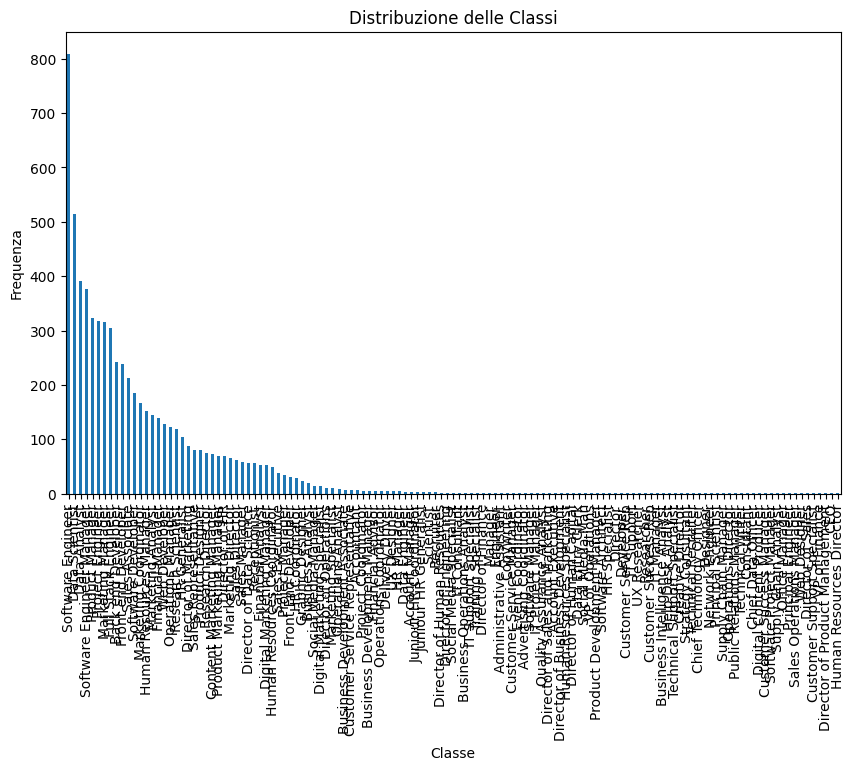

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

class_counts = data_cleaned['Job Title'].value_counts()

# Visualizzazione con Matplotlib
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar')
plt.title('Distribuzione delle Classi')
plt.xlabel('Classe')
plt.ylabel('Frequenza')
plt.show()

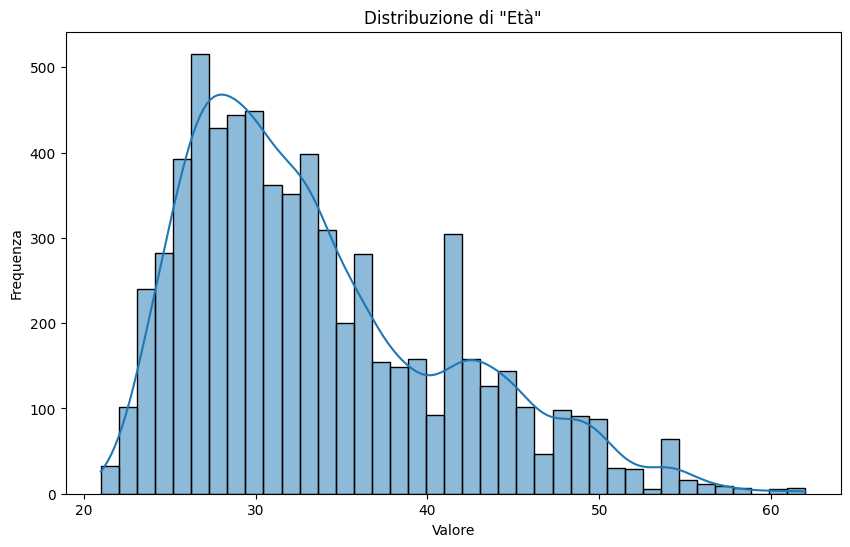

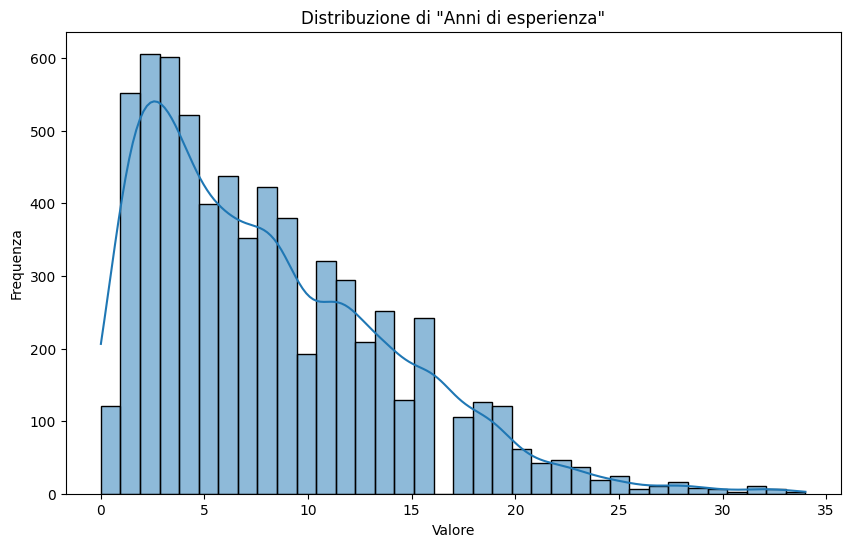

In [ ]:
import seaborn as sns

# Istogramma per Age
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Age'], kde=True)
plt.title('Distribuzione di "Età"')
plt.xlabel('Valore')
plt.ylabel('Frequenza')
plt.show()

# Istogramma per Years of Experience
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Years of Experience'], kde=True)
plt.title('Distribuzione di "Anni di esperienza"')
plt.xlabel('Valore')
plt.ylabel('Frequenza')
plt.show()

In [ ]:
job_title_counts = data_cleaned['Job Title'].value_counts()
job_title_counts

Software Engineer                 809
Data Scientist                    515
Data Analyst                      391
Software Engineer Manager         376
Product Manager                   323
                                 ... 
Customer Support Specialist         1
VP of Finance                       1
Director of Product Management      1
CEO                                 1
Human Resources Director            1
Name: Job Title, Length: 129, dtype: int64

In [ ]:
single_occurrence_job_titles = job_title_counts[job_title_counts == 1].index
single_occurrence_job_titles

Index(['Advertising Coordinator', 'Software Manager', 'IT Project Manager',
       'Quality Assurance Analyst', 'Director of Sales and Marketing',
       'Account Executive', 'Director of Business Development',
       'Human Resources Specialist', 'Director of Human Capital',
       'Data Entry Clerk', 'Social Media Man', 'VP of Operations',
       'Product Development Manager', 'Software Architect', 'HR Specialist',
       'Director', 'Developer', 'Customer Service Rep', 'IT Support',
       'UX Researcher', 'Researcher', 'Customer Success Rep', 'IT Manager',
       'Business Intelligence Analyst', 'Help Desk Analyst',
       'Technical Support Specialist', 'Creative Director',
       'Strategy Consultant', 'Technical Recruiter',
       'Chief Technology Officer', 'Designer', 'Network Engineer',
       'Principal Scientist', 'Supply Chain Manager', 'Operations Director',
       'Public Relations Manager', 'Technical Writer', 'Consultant',
       'Chief Data Officer', 'Digital Content 

In [ ]:
# Filtraggio del dataset per escludere i Job Title con una sola occorrenza
ds_cleaned = data_cleaned[~data_cleaned['Job Title'].isin(single_occurrence_job_titles)]

# Numero di righe nel dataset dopo l'eliminazione dei Job Title con una sola occorrenza
num_rows_final = ds_cleaned.shape[0]
num_rows_final

6631

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Codifica delle variabili categoriche
# Usiamo LabelEncoder per 'Gender' e 'Job Title'
label_encoder_gender = LabelEncoder()
ds_cleaned['Gender'] = label_encoder_gender.fit_transform(ds_cleaned['Gender'])

label_encoder_job_title = LabelEncoder()
ds_cleaned['Job Title'] = label_encoder_job_title.fit_transform(ds_cleaned['Job Title'])

# Divisione dei dati in features e target
X = ds_cleaned.drop('Job Title', axis=1)
y = ds_cleaned['Job Title']

# Divisione dei dati in set di addestramento e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizzazione delle variabili numeriche
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

<ipython-input-19-6bcf7972cbed>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_cleaned['Gender'] = label_encoder_gender.fit_transform(ds_cleaned['Gender'])
<ipython-input-19-6bcf7972cbed>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_cleaned['Job Title'] = label_encoder_job_title.fit_transform(ds_cleaned['Job Title'])


((5304, 5), (1327, 5))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Addestramento del modello Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predizione sul set di test
y_pred = rf_classifier.predict(X_test_scaled)

# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6797287113790504

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calcolo di Precision e Recall
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

# Calcolo dell'F1-Score
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

precision, recall, f1

(0.6832366650440981, 0.6797287113790504, 0.6714310594803781)

proviamo una convalida incrociata

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold

# Definizione della strategia di divisione stratificata
cv = StratifiedKFold(n_splits=5)

# Specifica delle metriche di valutazione
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

# Calcolo della convalida incrociata
cv_results = cross_validate(rf_classifier, X, y, cv=cv, scoring=scoring)

# Stampa dei risultati
print("Accuracy:", cv_results['test_accuracy'].mean())
print("Precision (Weighted):", cv_results['test_precision_weighted'].mean())
print("Recall (Weighted):", cv_results['test_recall_weighted'].mean())
print("F1-Score (Weighted):", cv_results['test_f1_weighted'].mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

Accuracy: 0.517280612320286
Precision (Weighted): 0.5178044695104972
Recall (Weighted): 0.517280612320286
F1-Score (Weighted): 0.5017455586389994


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


dalla convalida incrociata è emerso che cè spazio di miglioramento e alcuni warning suggeriscono che ci sono alcune classi minorate.

ok non riesce ad effettuare oversempling dobbiamo agire sul dataset

In [ ]:
# Identificazione delle classi con meno di 5 esempi
class_counts = y_train.value_counts()
classes_to_remove = class_counts[class_counts <= 5].index

# Filtraggio del dataset per rimuovere le classi identificate
mask = y_train.apply(lambda x: x not in classes_to_remove)
X_train_filtered = X_train[mask]
y_train_filtered = y_train[mask]

# Verifica delle dimensioni del dataset filtrato e del numero di classi rimaste
filtered_class_counts = y_train_filtered.value_counts()

# Stampa delle informazioni
print(f"Classi rimosse: {len(classes_to_remove)}")
print(f"Dimensioni del dataset filtrato: {X_train_filtered.shape}")
print(f"Numero di classi rimaste: {len(filtered_class_counts)}")

# Ritorna le classi rimosse e il dataset filtrato per riferimento futuro
classes_to_remove, X_train_filtered.shape, len(filtered_class_counts)

Classi rimosse: 28
Dimensioni del dataset filtrato: (5232, 5)
Numero di classi rimaste: 47


(Int64Index([27, 11, 15, 74,  1, 55, 59, 42,  6,  0, 50, 36, 19, 40, 67, 20, 69,
             26, 73,  2, 43, 13, 25, 10,  7, 41, 22, 39],
            dtype='int64'),
 (5232, 5),
 47)

abbiamo pulito il dataset dalle classi con poche occorrenze precisamente meno di 5

In [ ]:
from imblearn.over_sampling import SMOTE

# Applicazione di SMOTE al dataset filtrato
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_filtered, y_train_filtered)

# Verifica delle dimensioni del dataset dopo l'applicazione di SMOTE e della distribuzione delle classi
smote_class_counts = y_train_smote.value_counts()

# Stampa delle informazioni
print(f"Dimensioni del dataset dopo SMOTE: {X_train_smote.shape}")
print(f"Distribuzione delle classi dopo SMOTE: {smote_class_counts.head()}")  # Stampa solo le prime per brevità

# Ritorna le dimensioni del dataset dopo SMOTE e un esempio della nuova distribuzione delle classi
X_train_smote.shape, smote_class_counts.head()

Dimensioni del dataset dopo SMOTE: (30785, 5)
Distribuzione delle classi dopo SMOTE: 29    655
63    655
64    655
45    655
65    655
Name: Job Title, dtype: int64


((30785, 5),
 29    655
 63    655
 64    655
 45    655
 65    655
 Name: Job Title, dtype: int64)

In [ ]:
# Addestramento del modello Random Forest
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_smote, y_train_smote)

# Predizione sul set di test
y_pred = rf_classifier.predict(X_test_scaled)

# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)
accuracy

precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

# Calcolo dell'F1-Score
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

precision, recall, f1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


(0.008952489110582508, 0.01808590806330068, 0.009829847062761249)

ok con l'oversampling abbiamo fatto guai adesso proviamo ad assegnare alle classi con minere presenza un peso maggiore nell'addestramento.

In [ ]:

# Addestramento del modello Random Forest
rf_classifier = RandomForestClassifier(class_weight='balanced',random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Predizione sul set di test
y_pred = rf_classifier.predict(X_test_scaled)

# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)


# Calcolo di Precision e Recall
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

# Calcolo dell'F1-Score
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

accuracy,precision, recall, f1

(0.6036171816126601,
 0.7060090746350357,
 0.6036171816126601,
 0.6203970896416686)

ok adesso riproviamo con la convalida incrociata

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definisci il modello
model = RandomForestClassifier(random_state=42)

# Definisci la griglia di iperparametri
param_grid = {
    'n_estimators': [100, 200, 300],  # Numero di alberi
    'max_depth': [None, 10, 20, 30],  # Profondità massima degli alberi
    'class_weight': [None, 'balanced']  # Pesi delle classi
}

# Configura la ricerca a griglia
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score=0)

# Esegui la ricerca a griglia
grid_search.fit(X_train_scaled, y_train)

# Stampa i migliori parametri e il punteggio
print("Migliori parametri:", grid_search.best_params_)
print("Miglior punteggio:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Migliori parametri: {'class_weight': None, 'max_depth': None, 'n_estimators': 300}
Miglior punteggio: 0.6983381644230257


In [ ]:
# Configura il modello con i migliori parametri identificati dalla ricerca a griglia
model = RandomForestClassifier(n_estimators=300, max_depth=None, class_weight=None, random_state=42)

# Addestramento del modello sul dataset completo o sul training set
model.fit(X_train_scaled, y_train)

# Valutazione del modello sul test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predizione sul test set
y_pred = model.predict(X_test_scaled)

# Calcolo delle metriche di valutazione
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.680482290881688
Precision: 0.6849673819889968
Recall: 0.680482290881688
F1 Score: 0.6728235265419072


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definisci la distribuzione degli iperparametri
param_dist = {
    'n_estimators': randint(100, 500),  # Numero di alberi
    'max_depth': [None] + list(range(5, 50)),  # Profondità massima degli alberi
}

# Configura la ricerca casuale
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)

# Esegui la ricerca casuale
random_search.fit(X_train_scaled, y_train)

# Stampa i migliori parametri e il punteggio
print("Migliori parametri:", random_search.best_params_)
print("Miglior punteggio:", random_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Migliori parametri: {'max_depth': 13, 'n_estimators': 369}
Miglior punteggio: 0.6994697064001565


In [ ]:
# Configura il modello con i migliori parametri identificati dalla ricerca a griglia
model = RandomForestClassifier(n_estimators=369, max_depth=13, class_weight=None, random_state=42)

# Addestramento del modello sul dataset completo o sul training set
model.fit(X_train_scaled, y_train)

# Valutazione del modello sul test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predizione sul test set
y_pred = model.predict(X_test_scaled)

# Calcolo delle metriche di valutazione
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Random forest classifier result")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.6782215523737755
Precision: 0.6821153521894118
Recall: 0.6782215523737755
F1 Score: 0.6689435656028856


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

# Addestramento del modello sul dataset completo o sul training set
model.fit(X_train_scaled, y_train)

# Valutazione del modello sul test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predizione sul test set
y_pred = model.predict(X_test_scaled)

# Calcolo delle metriche di valutazione
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

print("Decision tree result")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.6752072343632253
Precision: 0.6761291495986597
Recall: 0.6752072343632253
F1 Score: 0.6664404237674458
